In [36]:
library('igraph')

node_id=10
facebook_graph = read_graph("facebook_combined.txt", format="ncol", directed=FALSE)

In [78]:
# Q5
fb_ego_graph = function(g) {
    g_ego = make_ego_graph(g, order=1, '0')[[1]]
    plot(g_ego, edge.arrow.size=.1, vertex.size=5, vertex.label=NA, main="node ID 1 ego network")
    
    print(paste("Network ID 1 number of nodes: ", vcount(g_ego)))
    print(paste("Network ID 1 number of edges: ", ecount(g_ego)))
    
    # Q6
    print(paste("Network ID 1 diameter: ", diameter(g_ego)))
}

fb_core = function(g) {
    nodes = c(V(g)$name)
    cores = c()
    degree_averages = c()
    for(i in nodes){
        num_neighbors = length(neighbors(g_edgelist,i))
        if(num_neighbors > 200){
            degree_averages = c(degree_averages, degree(g_edgelist, i))
            cores = c(cores,i)
        } 
    }

    print(paste('Number of core nodes: ', length(cores)))
    print(paste('Average degree: ', mean(degree_averages)))
}

# Code provided by TA
core_communities = function(g, core_list=c('0','107','348','483','1086')) {
    for (core_id in core_list) {
        user_neighbors = neighbors(g, core_id)
        user_vertices = c(core_id, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)

        fast_greedy = cluster_fast_greedy(user_network)
        edge_betweenness = cluster_edge_betweenness(user_network)
        infomap = cluster_infomap(user_network)

        par(mfrow=c(1,3))
        options(repr.plot.width=15, repr.plot.height=4)
        plot(user_network, mark.groups=groups(fast_greedy), vertex.color=fast_greedy$membership, vertex.size=6, vertex.label=NA, main=paste("Fast Greedy for NodeID: ",node_id))
        cat(sprintf("        Modularity of Fast Greedy: %0.3f", modularity(fast_greedy)))
        plot(user_network, mark.groups=groups(edge_betweenness), vertex.color=edge_betweenness$membership, vertex.size=6, vertex.label=NA, main=paste("Edge Betweenness for NodeID: ",node_id))
        cat(sprintf("        Modularity of Edge Betweenness: %0.3f", modularity(edge_betweenness)))
        plot(user_network, mark.groups=groups(infomap), vertex.color=infomap$membership, vertex.size=6, vertex.label=NA, main=paste("Infomap for NodeID: ",node_id))
        cat(sprintf("        Modularity of Infomap: %0.3f", modularity(infomap)))
    }
}

# Code provided by TA
coreless_communities = function(g, core_list=c('0','107','348','483','1086')) {
    for (core_id in core_list) {
        user_neighbors = neighbors(g, core_id)
        user_vertices = c(core_id, user_neighbors)
        user_network = induced_subgraph(g, user_vertices)
        user_network = delete_vertices(user_network, core_id)

        fast_greedy = cluster_fast_greedy(user_network)
        edge_betweenness = cluster_edge_betweenness(user_network)
        infomap = cluster_infomap(user_network)

        par(mfrow=c(1,3))
        options(repr.plot.width=15, repr.plot.height=4)
        plot(user_network, mark.groups=groups(fast_greedy), vertex.color=fast_greedy$membership, vertex.size=6, vertex.label=NA, main=paste("Fast Greedy for NodeID: ",node_id))
        cat(sprintf("        Modularity of Fast Greedy: %0.3f", modularity(fast_greedy)))
        plot(user_network, mark.groups=groups(edge_betweenness), vertex.color=edge_betweenness$membership, vertex.size=6, vertex.label=NA, main=paste("Edge Betweenness for NodeID: ",node_id))
        cat(sprintf("        Modularity of Edge Betweenness: %0.3f", modularity(edge_betweenness)))
        plot(user_network, mark.groups=groups(infomap), vertex.color=infomap$membership, vertex.size=6, vertex.label=NA, main=paste("Infomap for NodeID: ",node_id))
        cat(sprintf("        Modularity of Infomap: %0.3f", modularity(infomap)))
    }
}

[1] "Network ID 1 number of nodes:  348"
[1] "Network ID 1 number of edges:  2866"
[1] "Network ID 1 diameter:  2"


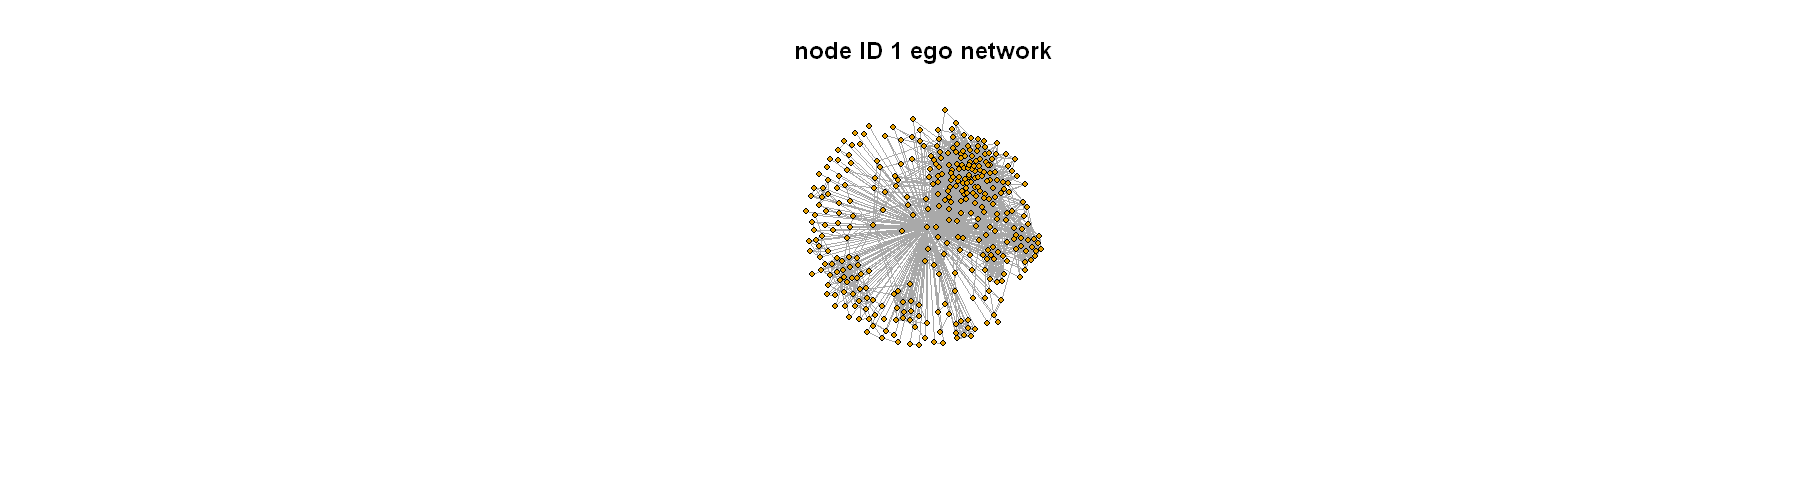

In [70]:
fb_ego_graph(facebook_graph)

In [73]:
fb_core(facebook_graph)

[1] "Number of core nodes:  40"
[1] "Average degree:  279.375"


        Modularity of Fast Greedy: 0.359        Modularity of Edge Betweenness: 0.352        Modularity of Infomap: 0.389        Modularity of Fast Greedy: 0.706        Modularity of Edge Betweenness: 0.713

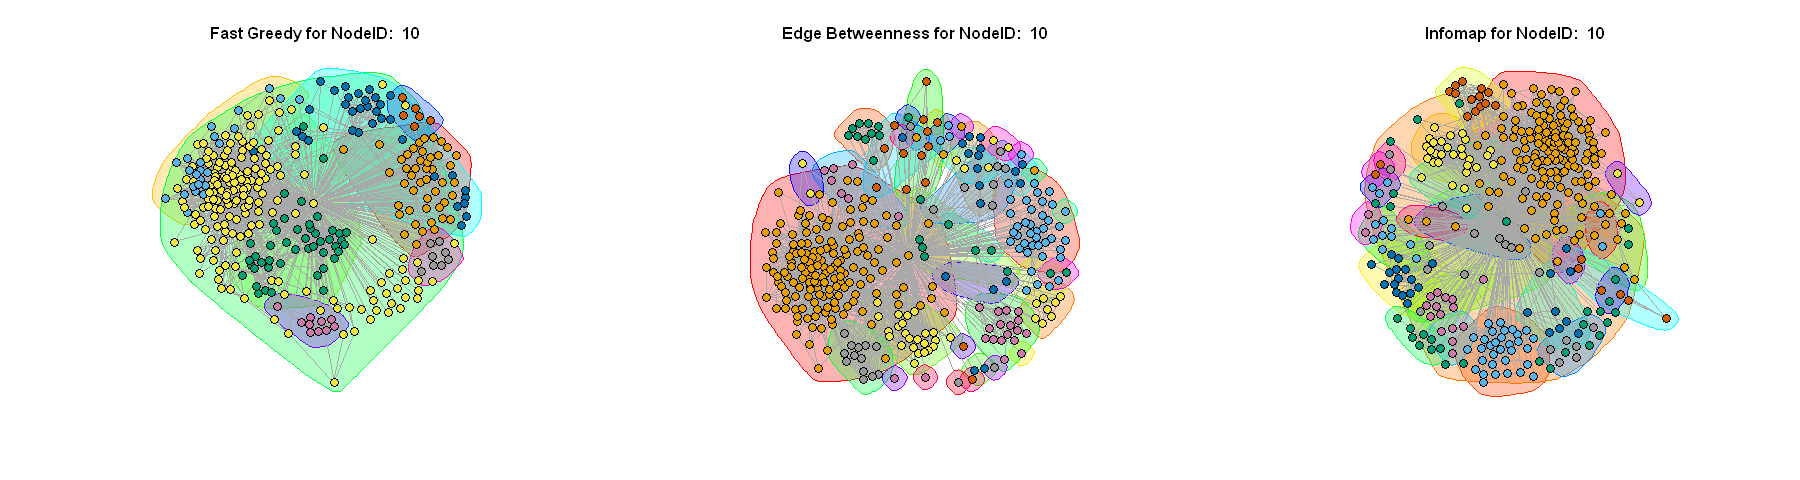

        Modularity of Infomap: 0.699        Modularity of Fast Greedy: 0.480        Modularity of Edge Betweenness: 0.466

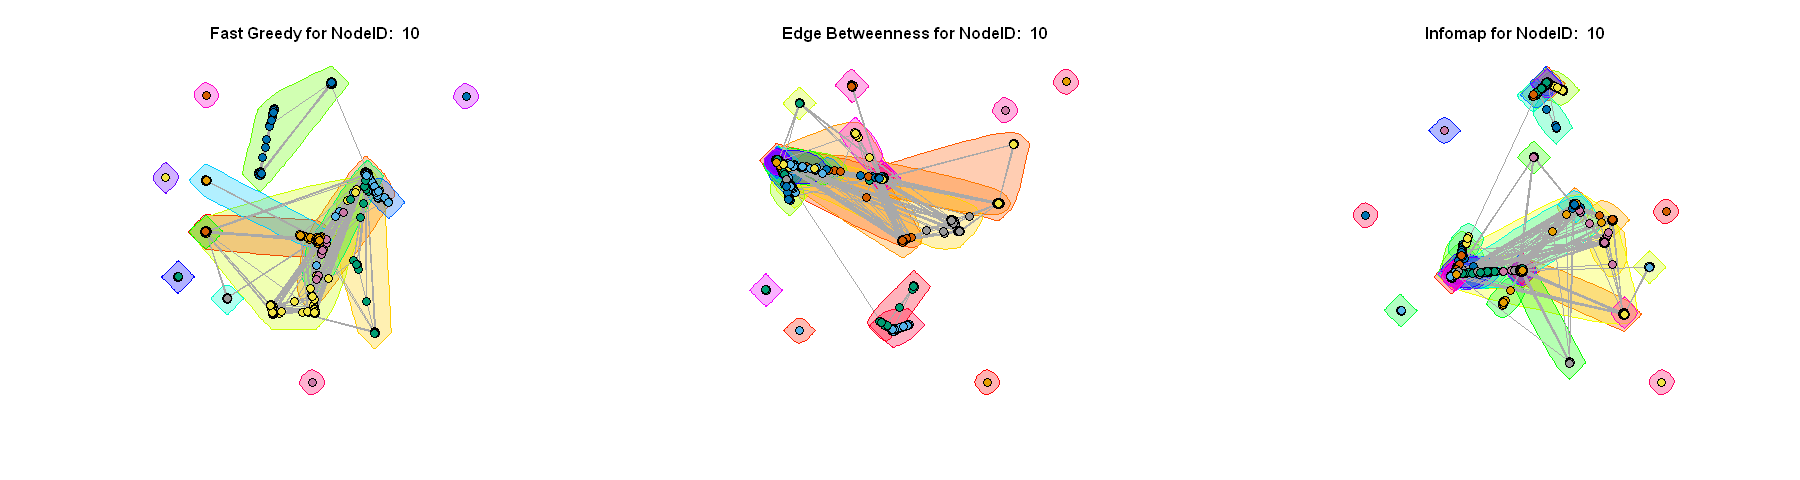

        Modularity of Infomap: 0.471        Modularity of Fast Greedy: 0.665        Modularity of Edge Betweenness: 0.678

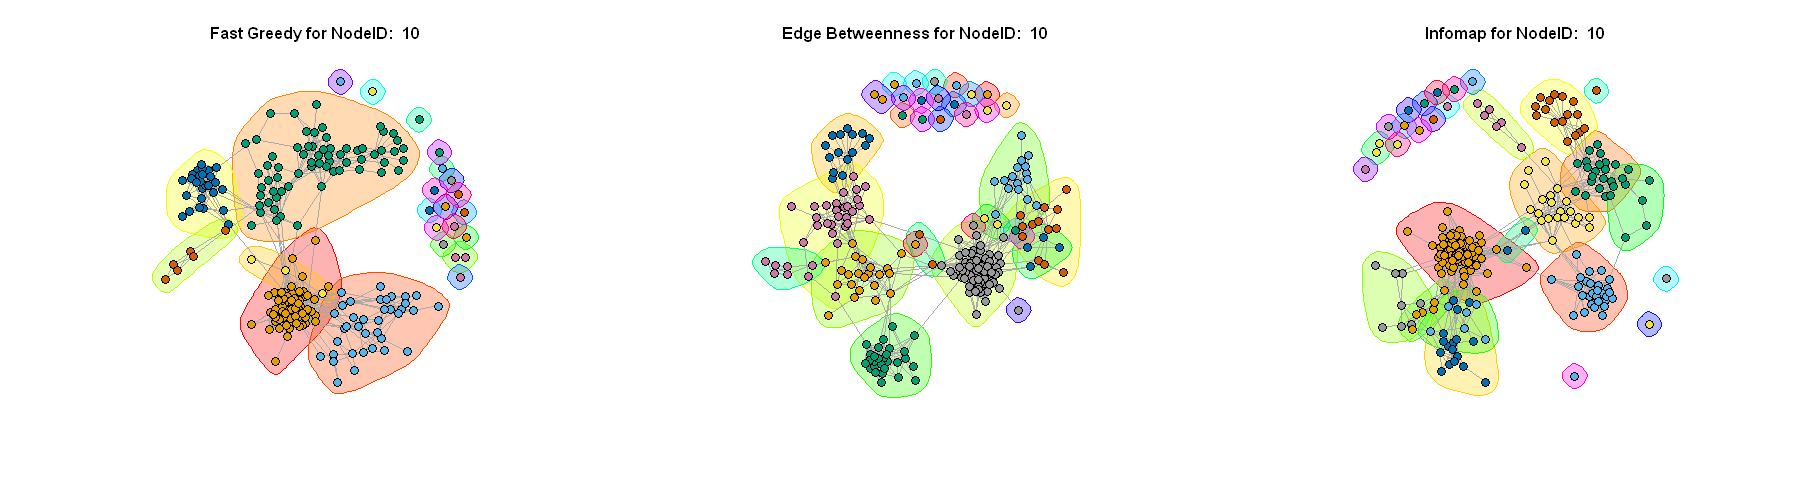

        Modularity of Infomap: 0.656        Modularity of Fast Greedy: 0.806        Modularity of Edge Betweenness: 0.812

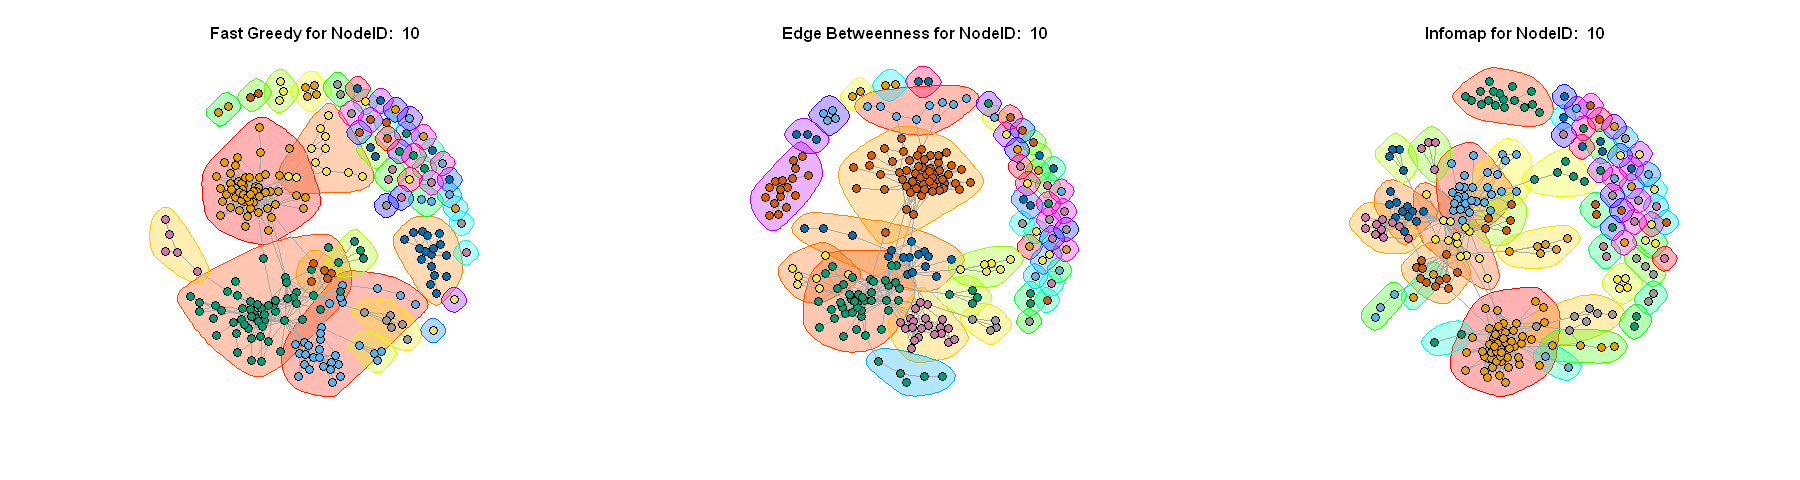

        Modularity of Infomap: 0.808

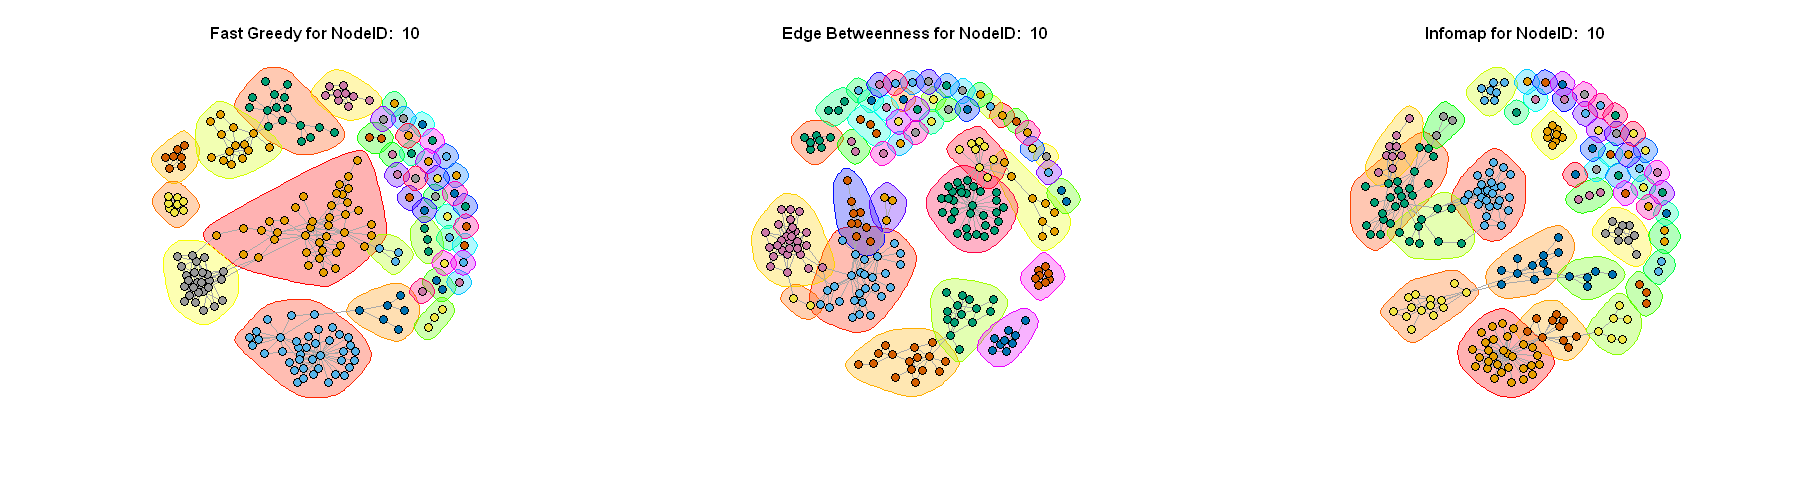

In [80]:
core_communities(facebook_graph)

        Modularity of Fast Greedy: 0.448        Modularity of Edge Betweenness: 0.416        Modularity of Infomap: 0.418        Modularity of Fast Greedy: 0.729        Modularity of Edge Betweenness: 0.743

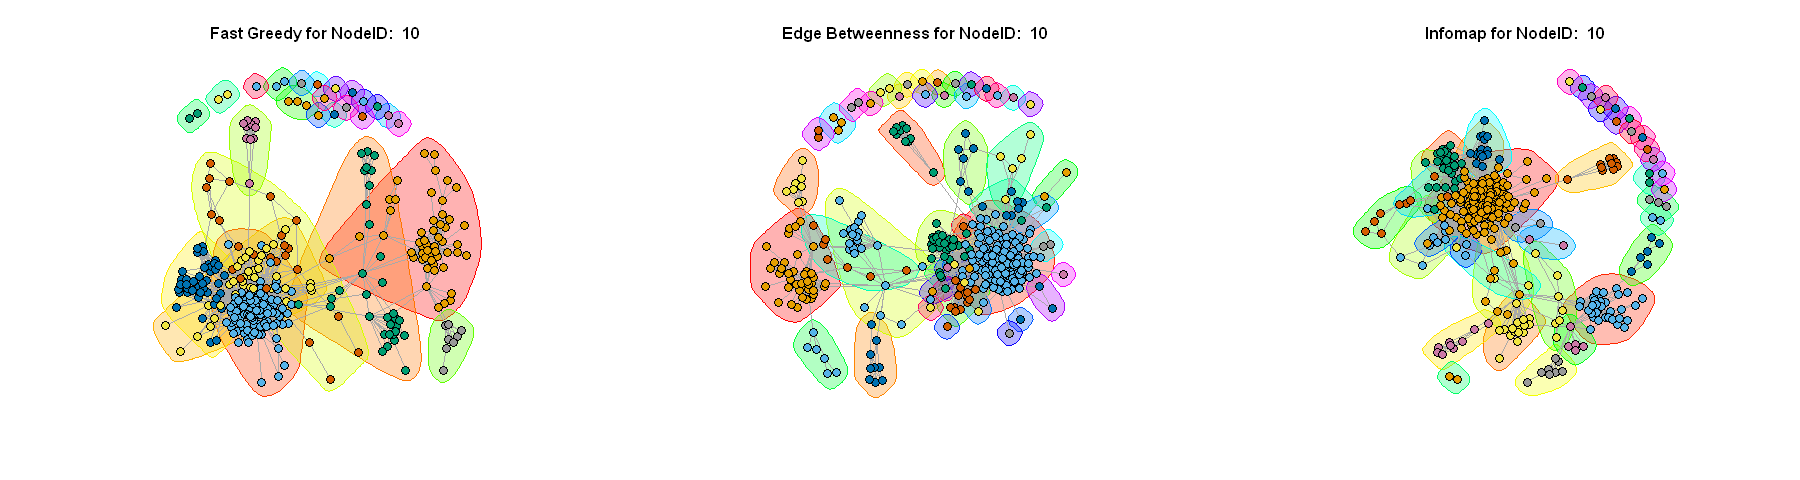

        Modularity of Infomap: 0.725        Modularity of Fast Greedy: 0.472        Modularity of Edge Betweenness: 0.458

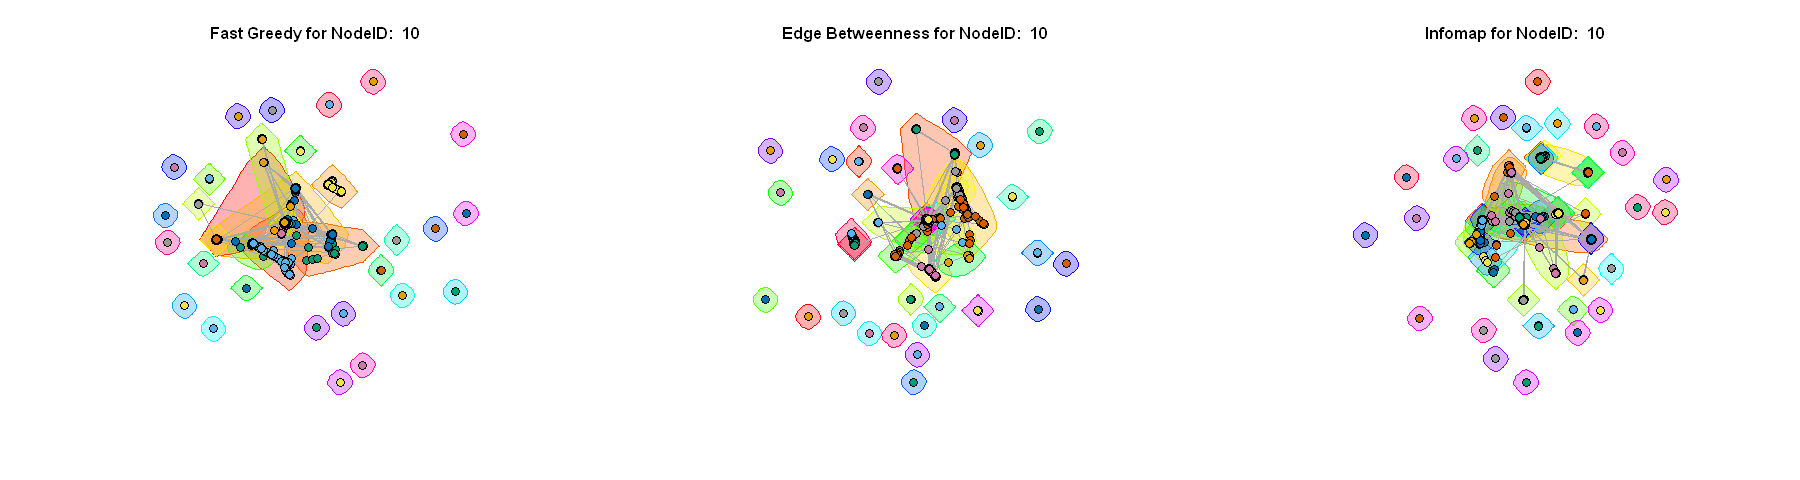

        Modularity of Infomap: 0.461        Modularity of Fast Greedy: 0.679        Modularity of Edge Betweenness: 0.688

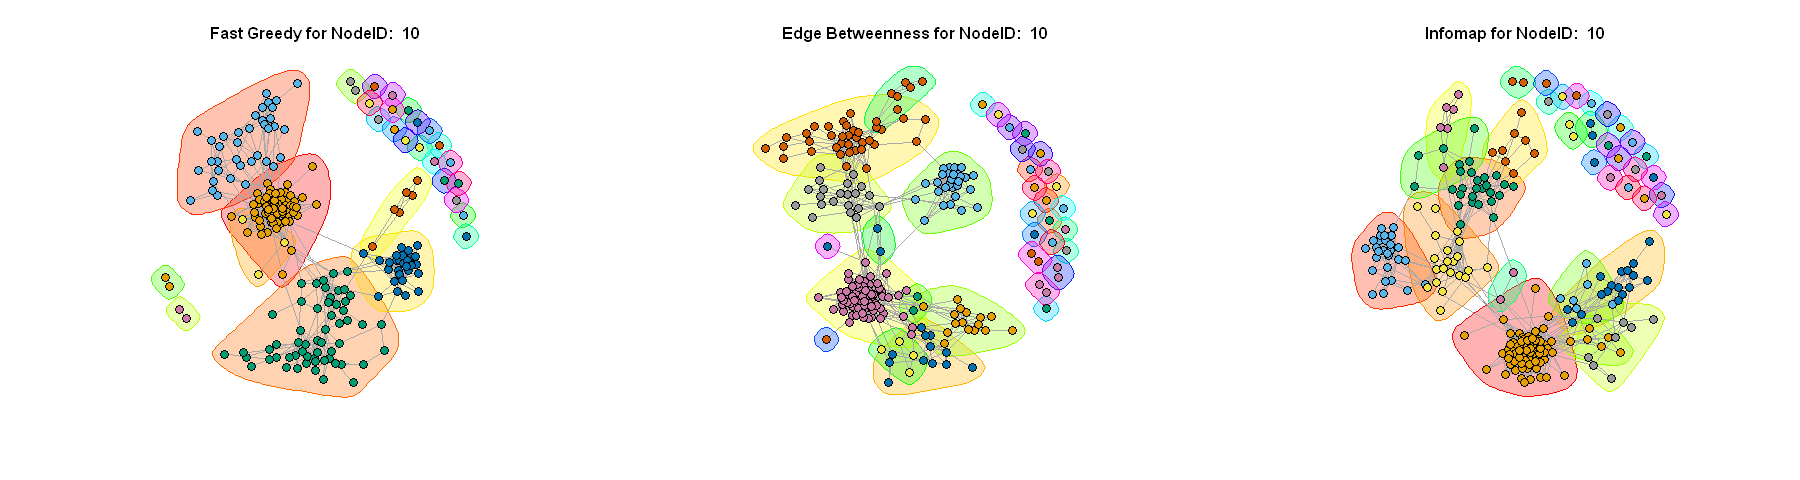

        Modularity of Infomap: 0.673        Modularity of Fast Greedy: 0.813        Modularity of Edge Betweenness: 0.822

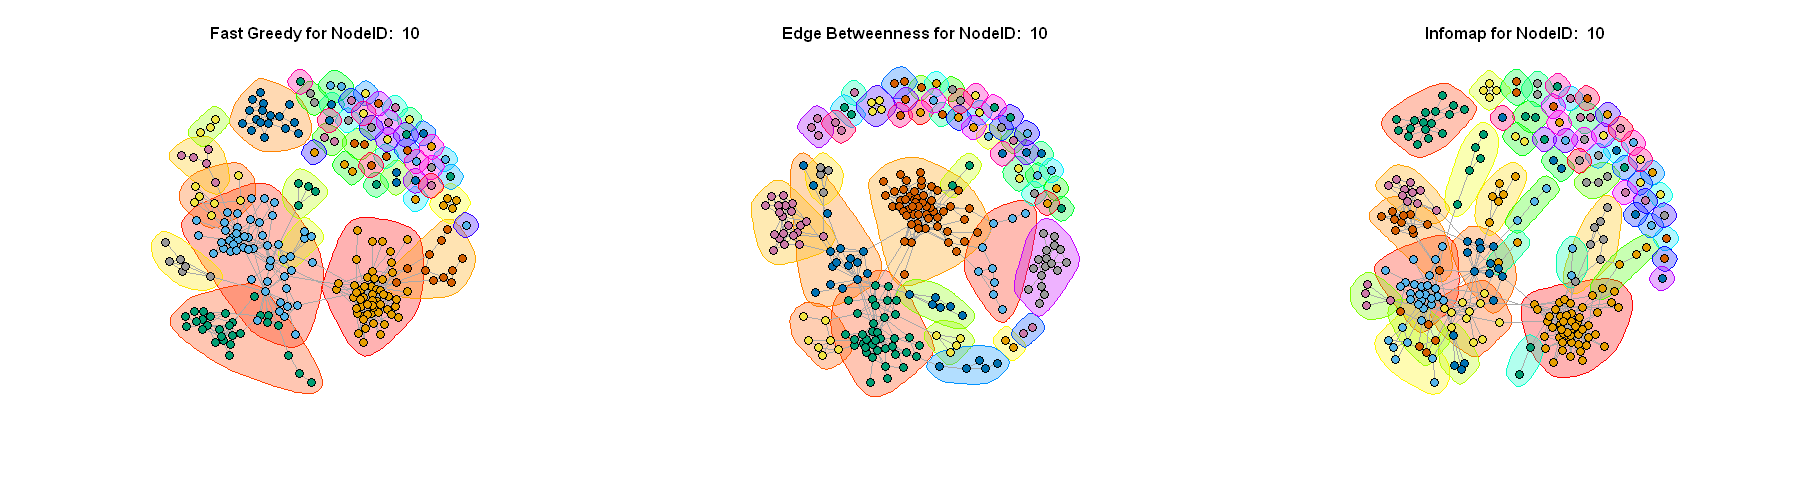

        Modularity of Infomap: 0.817

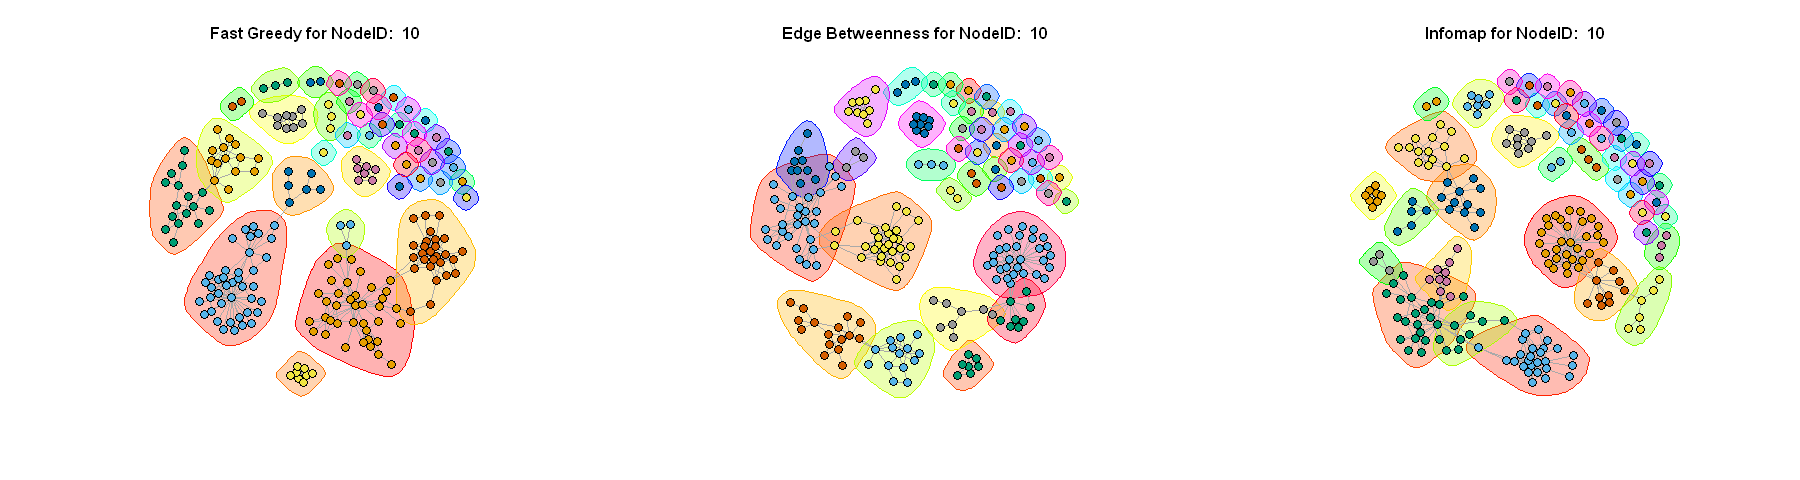

In [79]:
coreless_communities(facebook_graph)